In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Read the dataset
df = pd.read_csv("titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Select relevant columns
df = df[['Survived', 'Age', 'Sex', 'Pclass']]

# Categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])

# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:

x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
# Train the logistic regression model
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [ ]:

y_pred = model.predict(x_test)

In [ ]:
# Evaluate the model on the test set
score = model.score(x_test, y_test)
print(f"Accuracy on test set: {score}")

Accuracy on test set: 0.8321678321678322


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# precision
precision = precision_score(y_test, y_pred)
print(f"Precision on test set: {precision}")

# recall
recall = recall_score(y_test, y_pred)
print(f"Recall on test set: {recall}")

# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 score on test set: {f1}")

Accuracy on test set: 0.8321678321678322
Precision on test set: 0.8541666666666666
Recall on test set: 0.7068965517241379
F1 score on test set: 0.7735849056603773


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[78  7]
 [17 41]]


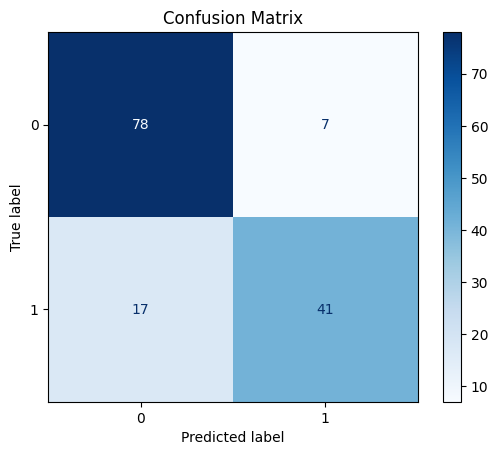

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you already have cm (confusion matrix) and model defined
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
